In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
import h5py
import numpy as np
from activ.analytics import heatmap
from activ.clustering import UmapClusteringResults
from os.path import dirname, join
from sklearn.metrics import accuracy_score

In [21]:
f = h5py.File('/Users/ahyeon/Desktop/activ misc/predict_scores.h5', 'r')

In [22]:
list(f.keys())

['cluster_sizes',
 'clusters',
 'norm_score',
 'score',
 'seed',
 'umap_dimensions',
 'umap_embeddings',
 'umap_embeddings_dimscale',
 'umap_min_dist',
 'umap_n_neighbors']

In [23]:
predictions = f['score'][:]
norm_predictions = f['norm_score'][:]
labels = f['clusters'][:]
umap_dims = f['umap_dimensions'][:]
cluster_sizes = f['cluster_sizes'][:]
cluster_sizes

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])

In [101]:
predictions.shape
print(predictions[0,0,48,:])

[  0.  15.  20.  38.  13.   0.  27.  13.  18.   2.  13.  10.  27.  35.  42.
  25.   2.   7.  19.  18.  24.   1.  19.  21.   1.   5.  18.  19.   5.  12.
   3.  32.  27.  19.  23.  20.  12.  16.  15.  19.   1.  19.  18.  11.  19.
  11.  27.  22.  11.  12.  25.  11.  32.  10.   9.  37.  11.  18.   4.  16.
  16.  19.  20.  21.  19.  19.  12.   4.  39.  27.  12.  32.  12.  12.  19.
  20.  21.   1.  24.  36.  13.  12.   4.   9.  22.   2.   3.   6.  39.  28.
  42.  22.  11.   8.   3.   0.  49.  30.  15.  10.  28.   6.   0.   4.  35.
  11.   9.  48.  25.   4.  11.   1.  14.   9.  48.  13.  46.   6.  12.  33.
   6.  11.  14.  47.  49.   3.  13.   8.  12.  14.  36.   2.   3.   1.   7.
   1.  19.   2.  14.  22.  48.  11.   8.  28.   9.   9.  12.  15.  42.  18.
  20.   4.  18.  30.  46.   0.  17.  34.  26.   1.   4.  10.  13.   9.   2.
  36.  17.  35.   5.  16.  10.  41.  46.  30.   6.   6.   6.  35.   2.  48.
   7.  10.   9.  12.  25.   8.  18.  38.  38.   0.  36.   7.  35.  39.  18.
  24.  24.  

In [16]:
predictions.shape

(50, 9, 49, 247)

In [42]:
acc_mat = np.zeros((50,9,49,247))
norm_acc_mat = np.zeros((50,9,49,247))
for c in range(len(cluster_sizes)):
    for d in range(len(umap_dims)):
        for i in range(50):
            accuracy = accuracy_score(predictions[i,d,c,:], labels[i,d,c,:])
            norm_accuracy = accuracy_score(norm_predictions[i,d,c,:], labels[i,d,c,:])
            acc_mat[i,d,c,:] = accuracy
            norm_acc_mat[i,d,c,:] = norm_accuracy

In [45]:
avg_acc = acc_mat.mean(axis=0).mean(axis=0).mean(axis=1)
avg_norm_acc = norm_acc_mat.mean(axis=0).mean(axis=0).mean(axis=1)
avg_norm_acc.shape

(49,)

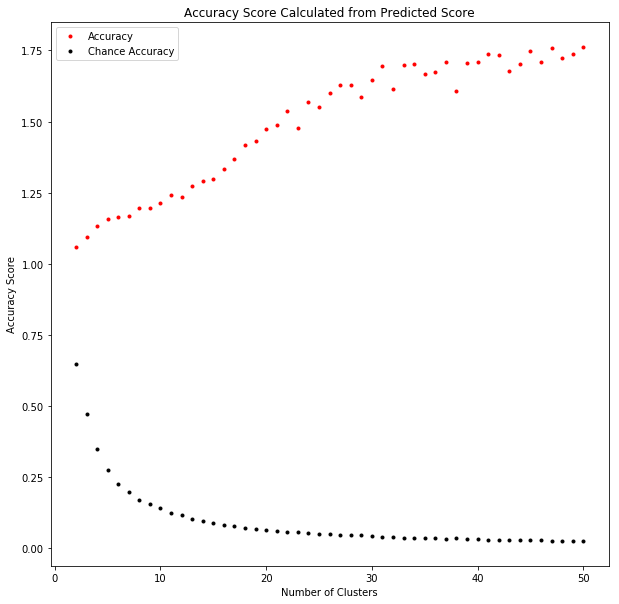

In [118]:
# Accuracy plot
plt.plot(cluster_sizes, avg_acc/avg_norm_acc, '.', color='red', label='Accuracy')
plt.plot(cluster_sizes, avg_norm_acc, '.', color='black', label='Chance Accuracy')
plt.xlabel('Number of Clusters')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Score Calculated from Predicted Score')
plt.legend()

(20, 1)
[[ 0.19005203  0.0210777   0.03245436  0.01234677  0.09604022  0.04356645
   0.04938707  0.0300732   0.04374283  0.06349766  0.0590881   0.05952906
   0.04400741  0.03721669  0.03933327  0.04391922  0.04030338  0.03457095
   0.03192521  0.02786842]]
[[ 0.19005203  0.0210777   0.03245436  0.01234677  0.09604022  0.04356645
   0.04938707  0.0300732   0.04374283  0.06349766  0.0590881   0.05952906
   0.04400741  0.03721669  0.03933327  0.04391922  0.04030338  0.03457095
   0.03192521  0.02786842]]


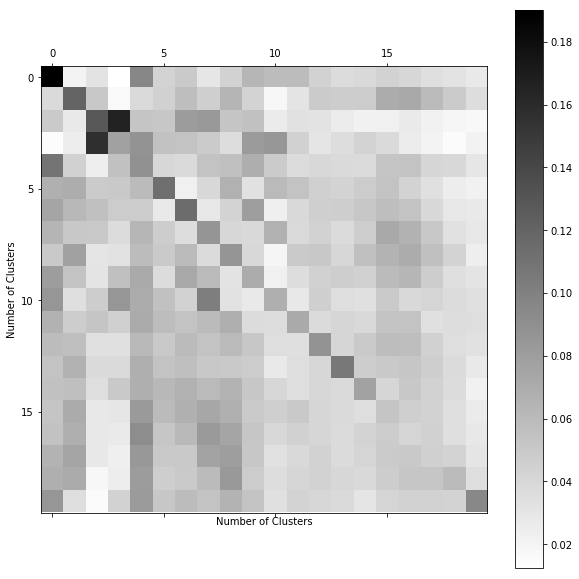

In [187]:
# Sensitivity plot (Confusion Matrix)
csize = 20
conf = np.zeros((50,len(umap_dims),csize,csize))

for i in range(50):
    for d in range(len(umap_dims)):
        preds = list(map(int,predictions[i,d,csize-2,:]))
        labs = list(map(int,labels[i,d,csize-2,:]))
        for p,l in zip(preds, labs):
            conf[i,d,p,l]+=1

new_conf = conf.mean(axis=0).mean(axis=0)
new_conf = np.matrix((new_conf))
denom = np.array(new_conf.sum(axis=1))
print(denom.shape)
new_denom = np.repeat(denom, csize,axis=1)
this = new_conf/new_denom

plt.rcParams['figure.figsize'] = 10, 10
plt.matshow(this, cmap='gray_r')
plt.xlabel('Number of Clusters')
plt.ylabel('Number of Clusters')
plt.colorbar()


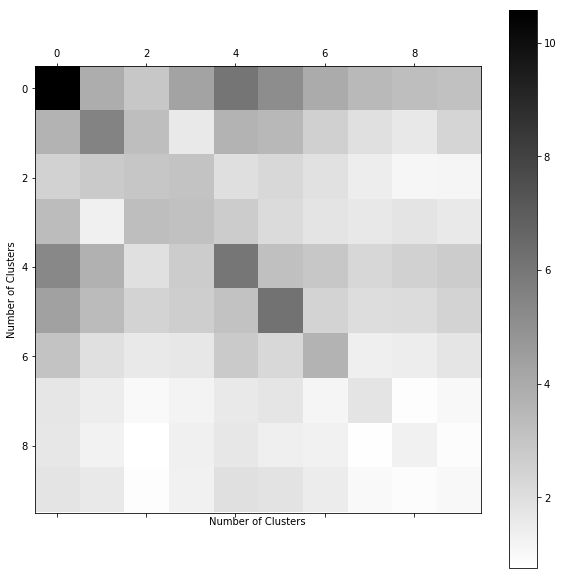

In [126]:
# Sensitivity plot (Confusion Matrix)
csize = 10
conf = np.zeros((50,len(umap_dims),csize,csize))



for i in range(50):
    for d in range(len(umap_dims)):
        preds = list(map(int,predictions[i,d,csize-2,:]))
        labs = list(map(int,labels[i,d,csize-2,:]))
        for p,l in zip(preds, labs):
            conf[i,d,p,l]+=1

new_conf = conf.mean(axis=0).mean(axis=0)
plt.rcParams['figure.figsize'] = 10, 10
plt.matshow(new_conf, cmap='gray_r')
plt.xlabel('Number of Clusters')
plt.ylabel('Number of Clusters')
plt.colorbar()


In [191]:
x = np.matrix(([2,4,6],[8,10,12]))
y = np.matrix(([2,2,2],[3,3,3]))

In [192]:
x/y

matrix([[ 1.        ,  2.        ,  3.        ],
        [ 2.66666667,  3.33333333,  4.        ]])